In [310]:
import pymolpro
import pandas as pd 

In [311]:
backend = 'local' 
project_name = 'BHROT27_methodtest'
parallel = 8

In [312]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [313]:
db = pymolpro.database.load("GMTKN55_BHROT27")

In [314]:
small=db.subset(open_shell=False,max_electrons=18)
print(small)

GMTKN55 BHROT27 (closed shell only) (maximum number of electrons 18):

Molecules:
methanol_st: {'geometry': '6\n \n O     0.1640874    1.0771522    0.0000000 \n C     0.1319097   -0.3310036    0.0000000 \n H     1.1612146   -0.6758875    0.0000000 \n H    -0.3605642   -0.7355506    0.8858582 \n H    -0.3605642   -0.7355506   -0.8858582 \n H    -0.7360833    1.4008402    0.0000000 \n', 'description': 'methanol_st'}
n2h4_ecl1: {'geometry': '6\n  \n   H   -0.00632875311476     -0.04084783654691     -0.00818150755843\n   N   0.99953758633452     -0.00230969538570     -0.00483617136550\n   N   1.47739957561209      1.34271283967645      0.00556578747329\n   H   0.71828264706118      2.00420913520683      0.00762829711197\n   H   2.03340332052250      1.48238021094367     -0.82227125429861\n   H   1.34770704304099     -0.45864761967431      0.82209606377530\n', 'description': 'n2h4_ecl1'}
nh2oh_ecl: {'geometry': '5\n  \n   N   -0.11115880832978     -0.02551613494687     -0.01730510413245\n  

In [315]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)       

IOStream.flush timed out
IOStream.flush timed out


{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4c33083c10>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4c330d4220>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4c332fba90>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4c33083e50>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4c31b83670>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4bf86cea40>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4c103326e0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4bc3e0c190>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4bc3deb4f0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4c702e7f70>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4bc2f3a350>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4bc2849ea0>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f4bc276a4d0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f4bc0e01060>}, 'CCSD':

In [316]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7f4c33081810>, 'MP2': <pymolpro.database.Database object at 0x7f4c33080d00>, 'MP3': <pymolpro.database.Database object at 0x7f4c33082b30>, 'MP4': <pymolpro.database.Database object at 0x7f4ae9c7c5e0>, 'PAPT2': <pymolpro.database.Database object at 0x7f4ae9c7cbb0>, 'PAPT3': <pymolpro.database.Database object at 0x7f4ae9c7c760>, 'PAPT4': <pymolpro.database.Database object at 0x7f4ae9c7c6a0>, 'CCSD': <pymolpro.database.Database object at 0x7f4ae9c7c700>, 'CCSD(T)': <pymolpro.database.Database object at 0x7f4ae9c7c520>}


In [317]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF,MP2,MP3,MP4,PAPT;MP2,PAPT;MP3,PAPT;MP4,CCSD,CCSD(T)
,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z,cc-pV[23]Z
MAD,1.54,0.54,0.42,0.07,0.31,0.31,0.02,0.36,0.00
MAXD,5.95,1.56,1.50,0.13,1.06,1.06,0.05,1.23,0.00
RMSD,2.30,0.68,0.59,0.08,0.43,0.43,0.03,0.51,0.00
MSD,1.33,0.52,0.32,-0.01,0.18,0.18,-0.00,0.32,0.00
STDEVD,1.99,0.47,0.52,0.08,0.41,0.41,0.03,0.42,0.00


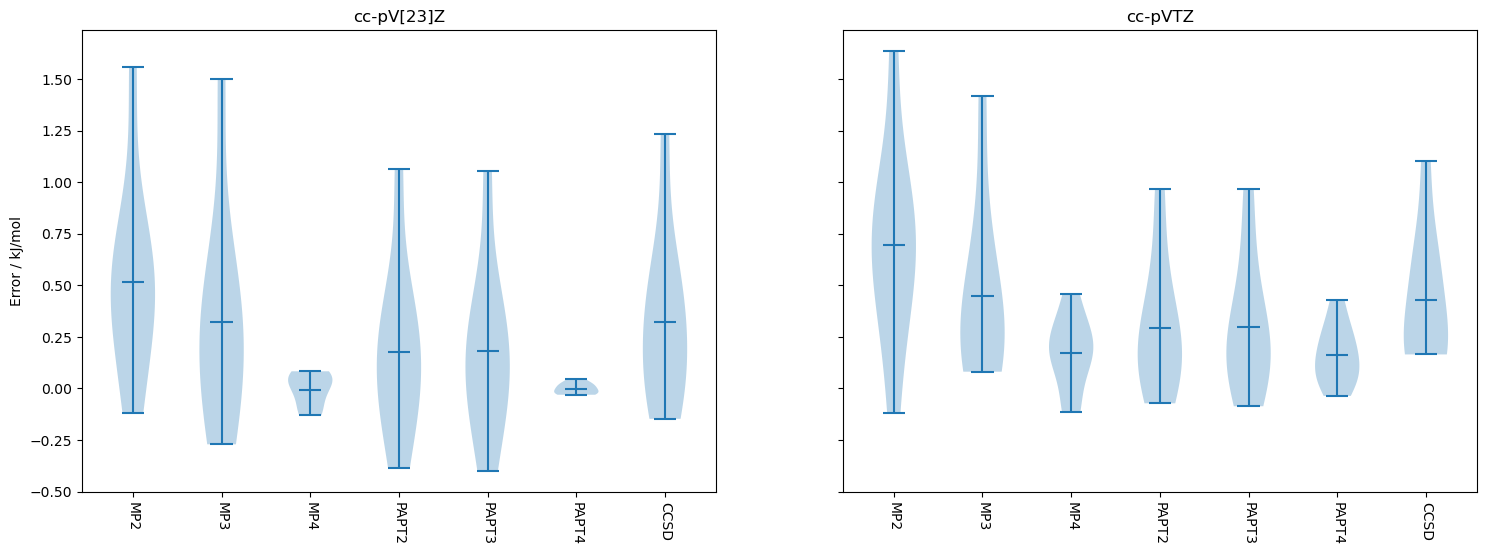

In [318]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")